In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [297]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col='Unnamed: 0')

/Users/braytonhall/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34545 entries, 49938 to 303778
Columns: 358 entries, _STATE to _AIDTST3
dtypes: float64(352), int64(5), object(1)
memory usage: 94.6+ MB


In [299]:
df.shape

(34545, 358)

In [300]:
df['_STATE'].value_counts(dropna=False)

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [301]:
# All the states in df already limited to CT, NJ and NY. 

Now check to see how large our subset df.

In [302]:
# your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34545 entries, 49938 to 303778
Columns: 358 entries, _STATE to _AIDTST3
dtypes: float64(352), int64(5), object(1)
memory usage: 94.6+ MB


**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [303]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

In [304]:
df['PHYSHLTH'].isna().any()

False

In [305]:
df['_STATE'].value_counts()

36.0    12249
34.0    11708
9.0     10588
Name: _STATE, dtype: int64

In [306]:
df.drop(df.loc[df['PHYSHLTH'] == 99]['PHYSHLTH'].index, inplace=True)
df['PHYSHLTH'].value_counts(ascending=False)

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

### Below, we get rid of every row including a score of '99' or '77', since these values respectively indicate a patient's refusal to provide their own 1-30 value, or a 'Don’t know/Not sure' indication by the patient. There were only 305 (out of a total 34, 545) of the '99' ratings and only 493 of the '77' ratings, so removing them shouldn't introduce much bias in the data.

### We also drop all rows with health scores of '88', since we're only interested in comparing CT, NJ, and NY based on patients with bad health histories in the past month (leaving only '1'-'30' values).

In [307]:
just_with_the_nones['PHYSHLTH'].value_counts()

88.0    21296
Name: PHYSHLTH, dtype: int64

In [308]:
df.drop(df.loc[df['PHYSHLTH'] == 99].index, inplace=True)
df.drop(df.loc[df['PHYSHLTH'] == 77].index, inplace=True)
just_with_the_nones = df.loc[df['PHYSHLTH'] == 88]
df_bad_health = df.drop(df.loc[df['PHYSHLTH'] == 88].index)
df_bad_health['PHYSHLTH'].value_counts()

30.0    2438
2.0     1993
1.0     1538
3.0     1187
5.0     1092
10.0     751
7.0      641
15.0     640
4.0      622
20.0     402
14.0     326
6.0      187
25.0     159
8.0       99
21.0      70
12.0      69
28.0      57
29.0      35
27.0      22
18.0      19
16.0      16
9.0       15
17.0      15
22.0      12
13.0      10
19.0      10
11.0       8
24.0       7
26.0       7
23.0       4
Name: PHYSHLTH, dtype: int64

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [309]:
CT = df_bad_health.loc[df['_STATE'] == 9.0, ['PHYSHLTH', '_STATE']]
NJ = df_bad_health.loc[df['_STATE'] == 34.0, ['PHYSHLTH', '_STATE']]
NY = df_bad_health.loc[df['_STATE'] == 36.0, ['PHYSHLTH', '_STATE']]

## Below is a boxplot and histogram set that includes the PHYSHLTH data for each state, with their respective descriptive statistics.

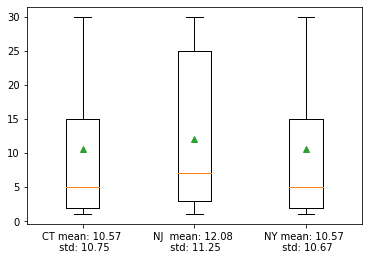

In [355]:
plt.boxplot([CT['PHYSHLTH'], NJ['PHYSHLTH'], NY['PHYSHLTH']], labels=['CT mean: 10.57 \n std: 10.75', \
                                                                      'NJ  mean: 12.08 \n std: 11.25', \
                                                                      'NY mean: 10.57 \n std: 10.67'], \
                                                                        showmeans=True)
plt.show()

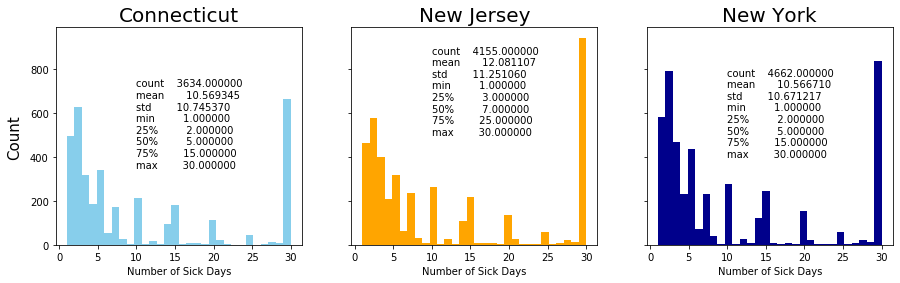

In [311]:
fig, ax = plt.subplots(1, 3, figsize = (15,4), sharey=True)
fig.text(0.08, 0.5, 'Count', va='center', rotation='vertical', fontsize = 15)
# fig.text(0.45, 0, 'Number of Days Sick Last Month', ha='center', rotation='horizontal', fontsize = 18)

ax[0].hist(CT['PHYSHLTH'], color='skyblue', bins=30)
ax[0].set_title('Connecticut', fontsize=20)
ax[0].text(10, 350, CT['PHYSHLTH'].describe().to_string())
ax[0].set_xlabel('Number of Sick Days')
ax[1].hist(NJ['PHYSHLTH'], bins=30, color='orange')
ax[1].set_title('New Jersey', fontsize=20)
ax[1].text(10, 500, NJ['PHYSHLTH'].describe().to_string())
ax[1].set_xlabel('Number of Sick Days')
ax[2].hist(NY['PHYSHLTH'], bins=30, color='darkblue')
ax[2].set_title('New York', fontsize=20)
ax[2].text(10, 400, NY['PHYSHLTH'].describe().to_string())
ax[2].set_xlabel('Number of Sick Days')

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

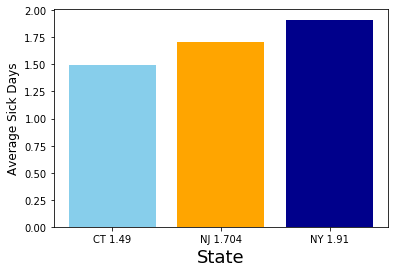

In [353]:
# code to calculate the average number of sick days by state


avg_CT_sickdays = len(CT['PHYSHLTH'])/len(df.loc[df['PHYSHLTH'] == 30])
avg_NJ_sickdays = len(NJ['PHYSHLTH'])/len(df.loc[df['PHYSHLTH'] == 30])
avg_NY_sickdays = len(NY['PHYSHLTH'])/len(df.loc[df['PHYSHLTH'] == 30])

# fig, ax = plt.subplots(1, 3, figsize = (15,4), sharey=True)

# ax[0].bar('CT', avg_CT_sickdays, color='skyblue')
# ax[0].bar('NJ', avg_NJ_sickdays, color='orange')
# ax[0].bar('NY', avg_NY_sickdays, color='darkblue')

plt.bar([f'CT {round(avg_CT_sickdays, 2)}', \
         f'NJ {round(avg_NJ_sickdays, 3)}', \
         f'NY {round(avg_NY_sickdays, 2)}'], \
        [avg_CT_sickdays, avg_NJ_sickdays, avg_NY_sickdays], \
        color=['skyblue', 'orange', 'darkblue'])
plt.xlabel('State', fontsize=18)
plt.ylabel('Average Sick Days', fontsize=12, rotation='vertical')
plt.show()

In [ ]:
# code to graph those averages using matplotlib

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [374]:
# code to create new colum for chronically sick
CT['chronic_sick']= CT['PHYSHLTH'].map(lambda x: True if x == 30 else False)
CT['chronic_sick'].value_counts(normalize=True)
NJ['chronic_sick']= NJ['PHYSHLTH'].map(lambda x: True if x == 30 else False)
NJ['chronic_sick'].value_counts(normalize=True)
NY['chronic_sick']= NY['PHYSHLTH'].map(lambda x: True if x == 30 else False)
NY['chronic_sick'].value_counts(normalize=True)

False    0.821107
True     0.178893
Name: chronic_sick, dtype: float64

In [396]:
CT_true = len(CT.loc[CT['chronic_sick'] == True])
CT_false = len(CT.loc[CT['chronic_sick'] == False])
NJ_true = len(NJ.loc[NJ['chronic_sick'] == True])
NJ_false = len(NJ.loc[NJ['chronic_sick'] == False])
NY_true = len(NY.loc[NY['chronic_sick'] == True])
NY_false = len(NY.loc[NY['chronic_sick'] == False])

plt.bar(['CT_true, CT_false, NJ_true, NJ_false, NY_true, NY_false'], )

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [ ]:
# code to calculate averages per state

In [ ]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  